In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import time

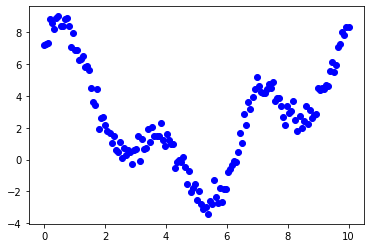

In [2]:
n = 150
X_data = np.linspace(0,10,n)
X_data = X_data.reshape((n,1))
Y_data = np.sin(X_data) + 2* np.sin(2 * X_data) + 0.3 * (X_data - 5)**2 
data_no_noise = np.concatenate((X_data, Y_data), axis=1)

Y_data += np.random.normal(0, 0.5, [n,1])

plt.plot(X_data, Y_data, 'bo')
plt.show()

In [3]:
data = np.concatenate((X_data, Y_data), axis=1)

np.random.shuffle(data)

data_tr, data_val, data_test = np.split(data, [int(0.8*n), int(0.8*n)+int(0.1*n)], axis = 0)
print(data_tr.shape, data_val.shape, data_test.shape)
n_tr, n_val, n_test = data_tr.shape[0], data_val.shape[0], data_test.shape[0]

(120, 2) (15, 2) (15, 2)


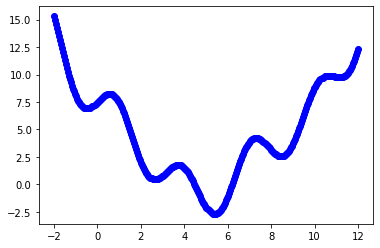

In [4]:
n_eval = 300
X_data = np.linspace(-2,12,n_eval)
X_data = X_data.reshape((n_eval,1))
Y_data = np.sin(X_data) + 2* np.sin(2 * X_data) + 0.3 * (X_data - 5)**2 

plt.plot(X_data, Y_data, 'bo')
plt.show()

data_eval = np.concatenate((X_data, Y_data), axis=1)


In [5]:
def next_batch(data_tr, i, batch_size):
    return data_tr[i*batch_size:(i+1)*batch_size-1, :]  

In [6]:
# Parameters
learning_rate = 0.02
num_epochs = 4000
batch_size = n_tr // 1
itpep = n_tr // batch_size
# display_step = 100
wd_par = 0.1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 1 
num_output = 1 

# tf Graph input
X = tf.placeholder(tf.float32, shape = [None, 1])
Y = tf.placeholder(tf.float32, shape = [None, 1])

In [7]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_output]))
}

In [8]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer 
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

In [9]:
fp = neural_net(X)
error = tf.reduce_sum(tf.pow(fp-Y, 2))

loss = n_tr / batch_size * tf.reduce_sum(tf.pow(fp-Y, 2)) \
                + wd_par * tf.reduce_sum([tf.reduce_sum(tf.pow(weights[i], 2)) for i in weights])

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

W0909 09:47:36.047148 14732 deprecation.py:323] From C:\Users\afpsa\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1375: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!
Optimization for learning rate 0.020000 finished!


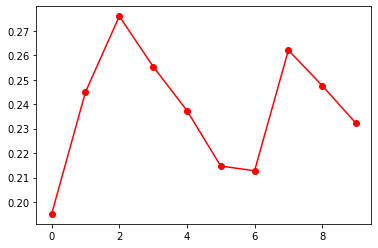

In [10]:
errors = []
opt_weights = []
opt_biases = []

init_weights = []
init_biases = []

sess = tf.Session()
for _ in range(10):
    
    #############################################################
    sess.run(init)
    
    init_weights.append(sess.run(weights))
    init_biases.append(sess.run(biases))
    #############################################################
    i = 0

    for iteration in range(num_epochs * itpep):

        data_batch = next_batch(data_tr, i, batch_size)
        sess.run(train_op, feed_dict={X: data_batch[:, [0]], Y: data_batch[:, [1]]})

        if (iteration + 1) % itpep == 0:
            i = 0
        else:
            i += 1
    print('Optimization for learning rate', '{:.6f}'.format(learning_rate), 'finished!')
    
    errors.append(sess.run(error, feed_dict={X: data_val[:, [0]], Y: data_val[:, [1]]}) / n_val)
    opt_weights.append(sess.run(weights))
    opt_biases.append(sess.run(biases))
    
plt.plot(errors, 'ro-')
plt.show()

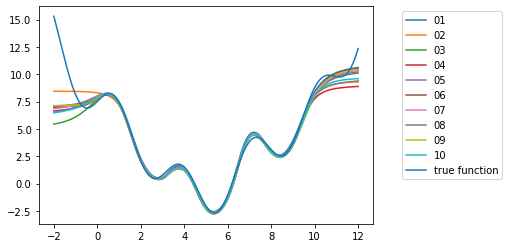

In [11]:
for c in range(len(opt_weights)):
    weights = opt_weights[c]
    biases = opt_biases[c]
    fp = neural_net(X)
    
    plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = '%.2d' %(c+1))
    
plt.plot(data_eval[:, [0]], data_eval[:, [1]], label = 'true function')
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()

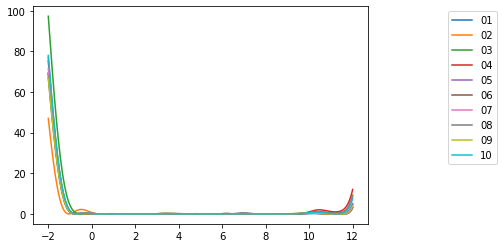

In [12]:
for c in range(len(opt_weights)):
    weights = opt_weights[c]
    biases = opt_biases[c]
    fp = neural_net(X)
    temp_error = sess.run(tf.pow(fp-Y, 2), feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]})
    
    plt.plot(data_eval[:, [0]], temp_error, label = '%.2d' %(c+1))
    
# plt.plot(data_eval[:, [0]], data_eval[:, [1]], label = 'true function')
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()

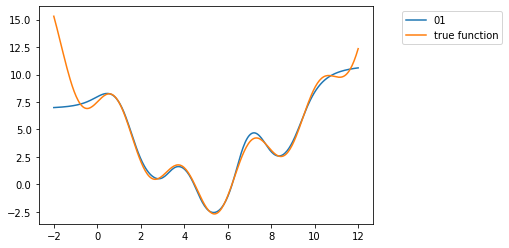

In [13]:
weights = opt_weights[0]
biases = opt_biases[0]
fp = neural_net(X)
    
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = '%.2d' %(0+1))
    
plt.plot(data_eval[:, [0]], data_eval[:, [1]], label = 'true function')
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()

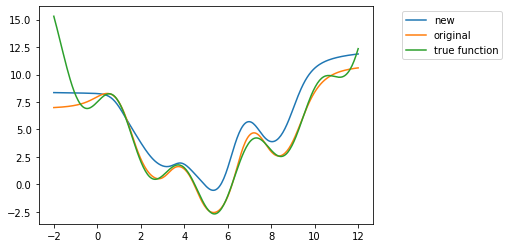

In [14]:
weights = dict(zip([key for key in opt_weights[0].keys()], [val+.01 for val in opt_weights[0].values()]))
biases = dict(zip([key for key in opt_biases[0].keys()], [val+.01 for val in opt_biases[0].values()]))
fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'new')

weights = opt_weights[0]
biases = opt_biases[0]
fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'original')
    
plt.plot(data_eval[:, [0]], data_eval[:, [1]], label = 'true function')
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()

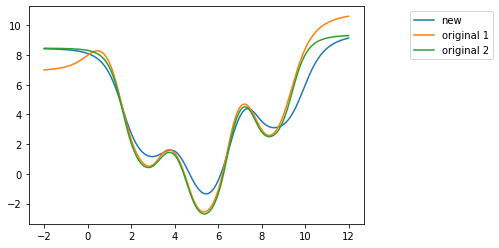

In [15]:
par = 0.1
l1 = [val for val in opt_weights[0].values()]
l2 = [val for val in opt_weights[1].values()]
new_vals = [par*x + (1-par)*y for x, y in zip(l1, l2)]
weights = dict(zip([key for key in opt_weights[0].keys()], new_vals))

l1 = [val for val in opt_biases[0].values()]
l2 = [val for val in opt_biases[1].values()]
new_vals = [par*x + (1-par)*y for x, y in zip(l1, l2)]
biases = dict(zip([key for key in opt_biases[0].keys()], new_vals))

fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'new')

weights = opt_weights[0]
biases = opt_biases[0]
fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'original 1')

weights = opt_weights[1]
biases = opt_biases[1]
fp = neural_net(X)
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'original 2')
    
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.show()


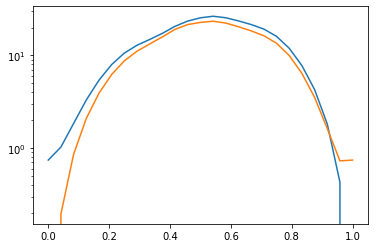

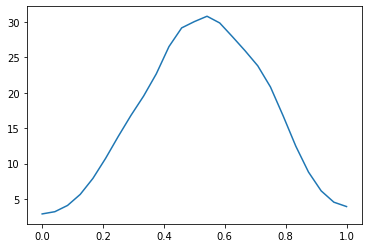

In [16]:
weights = opt_weights[0]
biases = opt_biases[0]
fp = neural_net(X)
pred_1 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

weights = opt_weights[1]
biases = opt_biases[1]
fp = neural_net(X)
pred_2 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

error_1 = []
error_2 = []
error_line = []

pars = np.linspace(0, 1, 25)

for par in pars:
    l1 = [val for val in opt_weights[0].values()]
    l2 = [val for val in opt_weights[1].values()]
    new_vals = [par*x + (1-par)*y for x, y in zip(l1, l2)]
    weights = dict(zip([key for key in opt_weights[0].keys()], new_vals))

    l1 = [val for val in opt_biases[0].values()]
    l2 = [val for val in opt_biases[1].values()]
    new_vals = [par*x + (1-par)*y for x, y in zip(l1, l2)]
    biases = dict(zip([key for key in opt_biases[0].keys()], new_vals))

    fp = neural_net(X)
    error = tf.reduce_sum(tf.pow(fp-Y, 2))
    
    pred = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})
    
    error_1.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_1}) / n)
    error_2.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_2}) / n)
    
    error_line.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]}) / n)

plt.yscale('log')
plt.plot(pars, error_1)
plt.plot(pars, error_2)
plt.show()

plt.plot(pars, error_line)
plt.show()
    

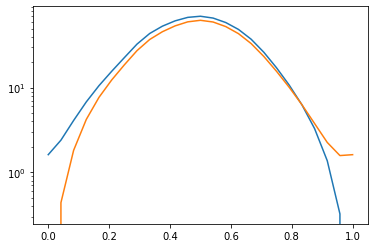

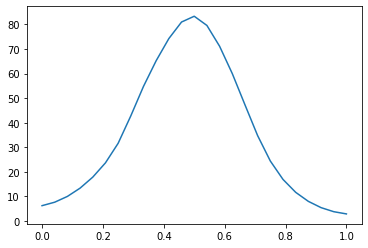

In [17]:
weights = opt_weights[1]
biases = opt_biases[1]
fp = neural_net(X)
pred_1 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

weights = opt_weights[2]
biases = opt_biases[2]
fp = neural_net(X)
pred_2 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

error_1 = []
error_2 = []
error_line = []

pars = np.linspace(0, 1, 25)

for par in pars:
    l1 = [val for val in opt_weights[1].values()]
    l2 = [val for val in opt_weights[2].values()]
    new_vals = [par*x + (1-par)*y for x, y in zip(l1, l2)]
    weights = dict(zip([key for key in opt_weights[1].keys()], new_vals))

    l1 = [val for val in opt_biases[1].values()]
    l2 = [val for val in opt_biases[2].values()]
    new_vals = [par*x + (1-par)*y for x, y in zip(l1, l2)]
    biases = dict(zip([key for key in opt_biases[1].keys()], new_vals))

    fp = neural_net(X)
    error = tf.reduce_sum(tf.pow(fp-Y, 2))
    
    pred = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})
       
    error_1.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_1}) / n)
    error_2.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_2}) / n)
    
    error_line.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]}) / n)

plt.yscale('log')
plt.plot(pars, error_1)
plt.plot(pars, error_2)
plt.show()

plt.plot(pars, error_line)
plt.show()

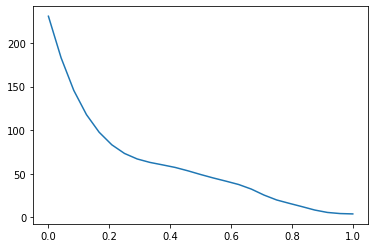

In [18]:
weights = opt_weights[0]
biases = opt_biases[0]
fp = neural_net(X)
pred_1 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

weights = init_weights[0]
biases = init_biases[0]
fp = neural_net(X)
pred_2 = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})

error_1 = []
error_2 = []
error_line = []

pars = np.linspace(0, 1, 25)

for par in pars:
    l1 = [val for val in opt_weights[0].values()]
    l2 = [val for val in init_weights[0].values()]
    new_vals = [par*x + (1-par)*y for x, y in zip(l1, l2)]
    weights = dict(zip([key for key in opt_weights[0].keys()], new_vals))

    l1 = [val for val in opt_biases[0].values()]
    l2 = [val for val in init_biases[0].values()]
    new_vals = [par*x + (1-par)*y for x, y in zip(l1, l2)]
    biases = dict(zip([key for key in opt_biases[0].keys()], new_vals))

    fp = neural_net(X)
    error = tf.reduce_sum(tf.pow(fp-Y, 2))
    
    pred = sess.run(fp, feed_dict = {X: data_eval[:, [0]]})
    
    error_1.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_1}) / n)
    error_2.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: pred_2}) / n)
    
    error_line.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]}) / n)

plt.plot(pars, error_line)
plt.show()
    

In [32]:
import itertools
flatten = itertools.chain.from_iterable

w1 = 0
w2 = 1
w3 = 2

l1 = list(opt_weights[w1].values())
l2 = [val for val in opt_weights[w2].values()]
new_vals = [y - x for x, y in zip(l1, l2)]
u_w = dict(zip([key for key in opt_weights[0].keys()], new_vals))
u_w_straight = list(flatten([val.flatten() for val in new_vals]))
u_sq_w = sum([x**2 for x in u_w_straight])

l1 = [val for val in opt_biases[w1].values()]
l2 = [val for val in opt_biases[w2].values()]
new_vals = [y - x for x, y in zip(l1, l2)]
u_b = dict(zip([key for key in opt_biases[0].keys()], new_vals))
u_b_straight = list(flatten([val.flatten() for val in new_vals]))
u_sq_b = sum([x**2 for x in u_b_straight])

norm_u = np.sqrt(u_sq_w + u_sq_b)
print(norm_u)

u_hat_w = dict(zip([key for key in opt_weights[0].keys()], [val/norm_u for val in u_w.values()]))
u_hat_b = dict(zip([key for key in opt_biases[0].keys()], [val/norm_u for val in u_b.values()]))

u_straight = u_w_straight + u_b_straight


83.6315371092827


In [20]:
l1 = [val for val in opt_weights[w1].values()]
l2 = [val for val in opt_weights[w3].values()]
new_vals = [y - x for x, y in zip(l1, l2)]
w3mw1_w = dict(zip([key for key in opt_weights[0].keys()], new_vals))
w3mw1_w_straight = list(flatten([val.flatten() for val in new_vals]))
# sq_w = sum([x**2 for x in w3mw1_w_straight])

l1 = [val for val in opt_biases[w1].values()]
l2 = [val for val in opt_biases[w3].values()]
new_vals = [y - x for x, y in zip(l1, l2)]
w3mw1_b = dict(zip([key for key in opt_biases[0].keys()], new_vals))
w3mw1_b_straight = list(flatten([val.flatten() for val in new_vals]))

w3mw1_straight = w3mw1_w_straight + w3mw1_b_straight
# sq_b = sum([x**2 for x in w3mw1_b_straight])

In [21]:
inner = sum([x * y for x, y in zip(u_straight, w3mw1_straight)])

l1 = [val for val in w3mw1_w.values()]
l2 = [val for val in u_w.values()]
new_vals = [x - inner/norm_u**2 * y for x, y in zip(l1, l2)]
v_w = dict(zip([key for key in opt_weights[0].keys()], new_vals))
v_w_straight = list(flatten([val.flatten() for val in new_vals]))
v_sq_w = sum([x**2 for x in v_w_straight])

l1 = [val for val in w3mw1_b.values()]
l2 = [val for val in u_b.values()]
new_vals = [x - inner/norm_u**2 * y for x, y in zip(l1, l2)]
v_b = dict(zip([key for key in opt_biases[0].keys()], new_vals))
v_b_straight = list(flatten([val.flatten() for val in new_vals]))
v_sq_b = sum([x**2 for x in v_b_straight])

norm_v = np.sqrt(v_sq_w + v_sq_b)

v_hat_w = dict(zip([key for key in opt_weights[0].keys()], [val/norm_v for val in v_w.values()]))
v_hat_b = dict(zip([key for key in opt_biases[0].keys()], [val/norm_v for val in v_b.values()]))

v_straight = v_w_straight + v_b_straight


In [39]:
pars = np.linspace(-30, 120, 15)
# pars = pars.astype(np.float32)

error_mat = []

for par_1 in pars:
    error_v = []
    for par_2 in pars:
        
        l1 = [val for val in opt_weights[w1].values()]
        l2 = [val for val in u_hat_w.values()]
        new_vals = [x + par_1 * y for x, y in zip(l1, l2)]

        l3 = list(v_hat_w.values())
        new_vals2 = [x + par_2 * y for x, y in zip(new_vals, l3)]
        

        weights = dict(zip([key for key in opt_weights[0].keys()], new_vals2))

        l1 = [val for val in opt_biases[w1].values()]
        l2 = [val for val in u_hat_b.values()]
        new_vals = [x + par_1 * y for x, y in zip(l1, l2)]

        l3 = list(v_hat_b.values())
        new_vals2 = [x + par_2 * y for x, y in zip(new_vals, l3)]
        
        biases = dict(zip([key for key in opt_biases[0].keys()], new_vals2))
        
        fp = neural_net(X)
        error = tf.reduce_sum(tf.pow(fp-Y, 2))
        
        error_v.append(sess.run(error, feed_dict = {X: data_eval[:, [0]], Y: data_eval[:, [1]]}) / n)

    error_mat.append(error_v)  
                
       

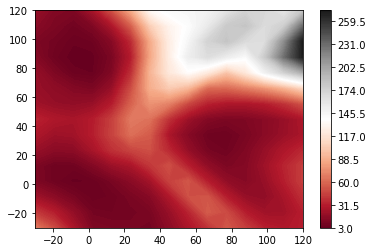

In [43]:
xx, yy = np.meshgrid(pars, pars)

plt.contourf(xx, yy, error_mat, 200, cmap='RdGy')
plt.colorbar(); 